# Введение
    Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, необходимо выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и спланирования рекламной кампании на 2017-й (предполагается, что сейчас декабрь 2016 г.). Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
    Составим план исследования:
     - подготовить данные для анализа
     - определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году
     - определить несколько потенциально прибыльных платформ и проанализировать зависимость продаж игр на них от других признаков.  
     - составить портрет пользователя каждого региона 
     - провести исследование статистических показателей оценок пользователей и критиков
     - сформулировать и сделать проверку гипотез
     - общий вывод

# Описание данных games.csv
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (от 0 до 100)
    User_Score — оценка пользователей (от 0 до 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Подготовка данных

Скачаем исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах 

In [2]:
games = pd.read_csv('games.csv') # считываем данные из файла

Посмотрим, как выглядят данные и правильно ли они считались.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Уже по выборке из 15 объектов видно, что некоторые записи заполнены лишь на половину. В столбце User_score у объекта под индексом 16706 находится значение 'tbd'. Эту аббревиатуру можно расшифровать как To Be Determined, то есть "Будет определено". В некорых названиях указан год релиза.

In [5]:
games.info() # узнаем больше информации о данных. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных довольно большое количество пропусков. Для признакa User_Score целесообразно привести значения столбца к другому типу данных -  к float.

In [6]:
games.columns=games.columns.str.lower() #cразу приведем названия полей к нижнему регистру для предотвращения опечат

In [7]:
games.isnull().sum() # оценим масштаб пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В данных присутствуют пропуски, как в большом объеме(8,5 тыс.), так и в малом (2). Посмотрим, можно ли без вреда удалить 2 объекта.

In [8]:
games['name']=games['name'].fillna('')
games.loc[games['name']=='']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих записях помимо названия игры отсутствуют данные о жанре, оценках критиков и пользователей, а также рейтинг. По году релиза игры очевидно, что эти данные не внесут свой вклад в решение задачи выявления потенциально успешного продукта в 2017 году. Поэтому их можно удалить.

In [9]:
games=games[games.name!='']

Давайте восстановим пропуски в столбце year_of_release из столбца name.

In [10]:
import re
games_no_year=games[games['year_of_release'].isnull()]
for name in games_no_year['name']:
    year=''
    result=re.search(r'19|20\d\d',name)
    if result:
        year=result.group(0)   
    if year!='':
        games.loc[games.name == name, 'year_of_release'] = float(year)
print('Оставшееся количество пропусков: {}'.format(len(games[games.year_of_release.isnull()])))

Оставшееся количество пропусков: 252


Восстановили только 17 объектов - довольно мало.

Сделаем предположение насчет 'tbd': значение 'tbd' в столбце 'user_score', попало случайно из колонки 'year_of_release', в играх, выпуск, которых еще планируется. Узнаем, сколько объектов имеет пометку 'tbd', сколько из них имеют неопределенный год, и какие года включают.

In [11]:
games_tbd=games.loc[games['user_score']=='tbd']
years_list=[int(year) for year in games_tbd['year_of_release'].unique() if not np.isnan(year)]
print('Количество объектов, для которых пользовательская оценка tbd: {}'
      .format(len(games_tbd)))
print('Количество объектов, для которых пользовательская оценка tbd и год выпуска не определен: {}'
      .format(len(games_tbd.query('year_of_release.isnull()', engine='python'))))
print('Диапазон лет, для которых пользовательская оценка tbd: {0}-{1}'.format(min(years_list),max(years_list)))

Количество объектов, для которых пользовательская оценка tbd: 2424
Количество объектов, для которых пользовательская оценка tbd и год выпуска не определен: 46
Диапазон лет, для которых пользовательская оценка tbd: 1997-2016


Не похоже, что это так. Может быть игра ждет оценки рейтинга, и 'tbd' попало в 'user_score' из колонки 'rating'.

In [12]:
print('Количество объектов, для которых пользовательская оценка tbd: {}'
      .format(len(games_tbd)))
print('Количество объектов, для которых пользовательская оценка tbd и рейтинг не определен: {}'.format(len(games_tbd.query('rating.isnull()', engine='python'))))

Количество объектов, для которых пользовательская оценка tbd: 2424
Количество объектов, для которых пользовательская оценка tbd и рейтинг не определен: 50


И это предположение не выглядит правдоподобным. Возможно, это связано с особенностями сбора оценки, либо говорит о выходе дополнений к игре, но чисто из данных это понять на данный момент невозможно, поэтому приравняем tbd к пропуску в значении.

In [13]:
games['user_score']=games['user_score'].replace('tbd', np.NaN)
games['user_score']=games['user_score'].astype(float) # приведение к типу float

Проверим, ассоциированы ли пропуски в столбце 'rating' с конкретными значениями 'year_of_release' и 'platform'.

In [14]:
def counter_skips(col):
    unique_values=games.query('rating.isnull()', engine='python')[col].unique()
    if len(unique_values)/len(games[col].unique())==1.0:
        print("Пропуски в столбце 'rating' присутствуют при всех значениях '{}'".format(col))
    else:
        print("Пропуски в столбце 'rating' присутствуют при значениях '{}':".format(col),end=' ')
        for value in unique_values[:-1]:
            print(str(value),end=', ')
        print(str(unique_values[-1])+'.') 

counter_skips('platform')
counter_skips('year_of_release')

Пропуски в столбце 'rating' присутствуют при всех значениях 'platform'
Пропуски в столбце 'rating' присутствуют при всех значениях 'year_of_release'


Пропуски в столбце 'rating' никак не ассоциированы с конкретными значениями 'year_of_release' и 'platform'. Рейтинг представлен знаками, используемые системой ESRB(основана в 1994). Помимо нее есть и другие системы оценок содержимого игр, разделенные по регионам. 
Заменим пропуски в столбце 'rating' на 'no rating'.

In [15]:
games['rating']=games['rating'].fillna('no rating')

Данных для восстановления пропусков в столбцах year_of_release, critic_score, user_scorе недостаточно, параметры являются уникальными для каждой игры. Восстановить пропущенные значения мы не можем. Оставим их, чтобы сохранить наибольший объем имеющихся данных.

Проверим результат преобразований

In [16]:
games.info() # как выглядят преобразования в типах.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Признак user_score приведен к типу float. Пропуски остались у признаков year_of_release, critic_score, user_scorе. Продолжим анализ с ними.

Добавим столбец, содержащий сумму всех продаж для каждого объекта и назовем его 'sum_sales'.

In [17]:
games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [18]:
games.head() # как теперь выглядит таблица

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


Проверяем нет ли дублирующих записей.

In [19]:
print('Количество дубликатов: {}'.format(games.duplicated().sum()))

Количество дубликатов: 0


Данные подготовлены к анализу.

# Исследовательский анализ

Узнаем сколько игр выпускалось в разные годы. 

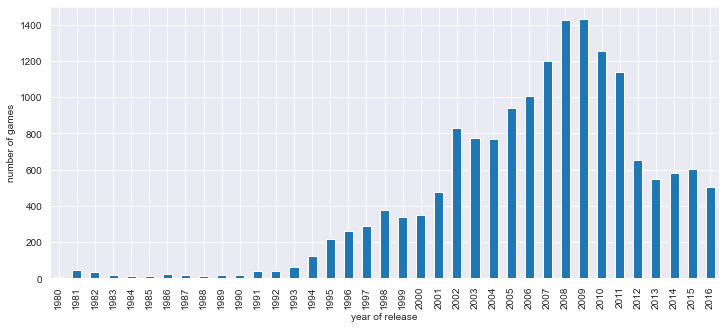

In [20]:
sb.set_style("darkgrid")
games_by_years=(games[['year_of_release','name']]
                 .groupby('year_of_release')
                 .agg('count'))
games_by_years.index=games_by_years.index.astype('int64')
games_by_years.plot(figsize=(12,5),kind='bar',legend=False)
plt.ylabel('number of games')
plt.xlabel('year of release')
plt.show()

В период с 2006 по 2011 количество выпускаемых игр не опускалось ниже 1000. Пик по количеству проданных игр приходится на 2008. В 2012 сократились почти вдвое - 653, и достигли 502 в 2016 (наименьшее значение с 2001 года). Возможно, что спад связан с кризисом 2008 года, который затронул и игровую индустрию, а также развитию рынка мобильных игр, стимулированного появлением таких площадок, обеспечивающих прямое взаимодействие между разработчиком и пользователем, как App Store и Android Market (с 2012 года Google Play).

## Отбор временного периода
Посмотрим, как менялись продажи по платформам.

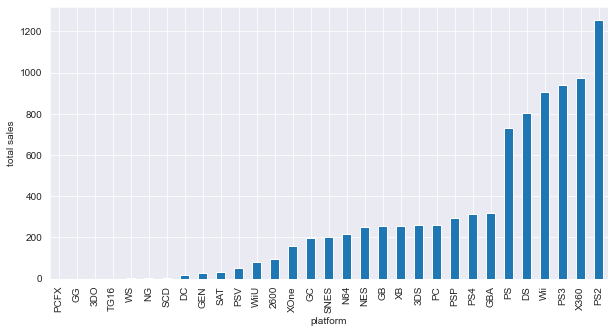

In [21]:
sales_by_platforms=(games.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum')
                    .sort_values(by = 'sum_sales'))
sales_by_platforms.plot(figsize=(10,5),kind='bar',legend=False)
plt.ylabel('total sales')
plt.xlabel('platform')
plt.show()

    В целом можно классифицировать консоли таким образом. PC в классификацию не входит.

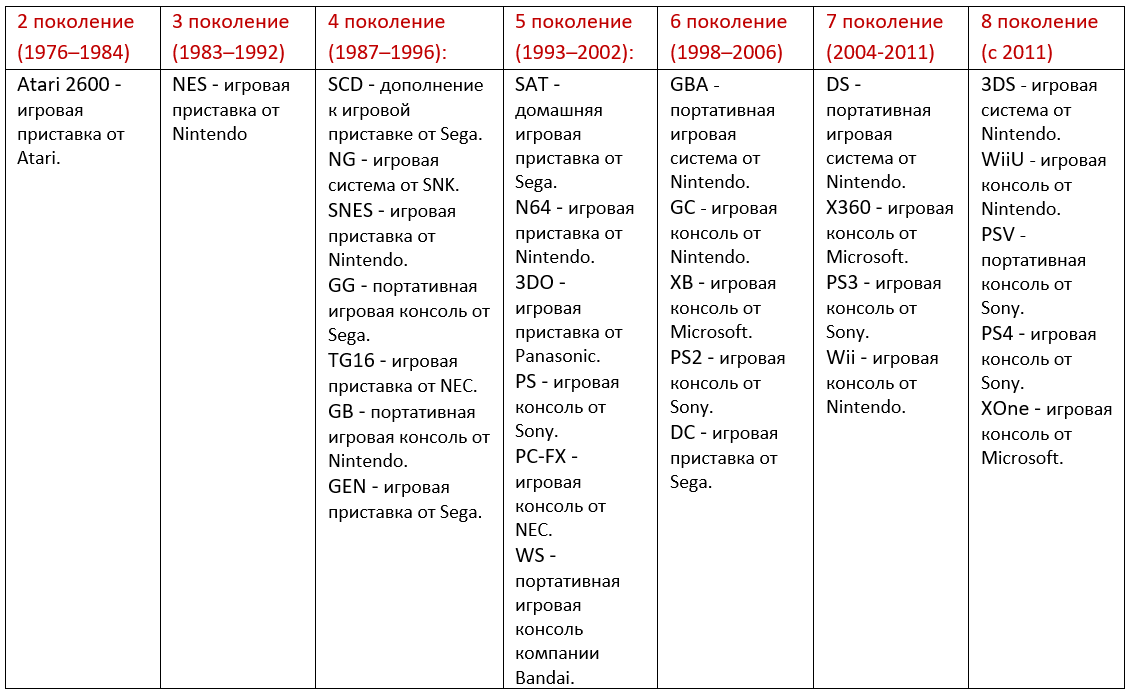

Получается продажи порядка тысячи игр приходятся на 7 поколение, а их сокрашение на 8.  

Выберем первые 6, как платформы с наибольшими суммарными продажами и построим графики распределения продаж по годам. Что характерно - они все относятся к тройке PlayStation (PS, PS2, PS3), Xbox (X360 следующая версия), Nintendo (Wii - игровая консоль, DS - портативная игровая система). 

In [22]:
def get_sales_platform_by_years(games,name):    # возвращает распределение суммарных продаж по конкретной платформе по году
    return (games.query('platform==@name')[['year_of_release','sum_sales']]
              .groupby('year_of_release').agg('sum'))
def get_us_score_by_genres(games,genre):    # возвращает пользовательские оценки по жанру
    return games.query('genre==@genre')['user_score']
def get_cr_score_by_genres(games,genre):    # возвращает оценки критиков по жанру
    return games.query('genre==@genre')['critic_score']

def draw_hist(ax,draw_func,games_ser):
    kind,reviewer=draw_func.split('_')
    if reviewer=='user':
        bins=linspace(1,10,10)
    if reviewer=='critic':
        bins=linspace(10,100,10)
    games_ser.plot(ax=ax,kind=kind,bins=bins)
        
        
def draw_scatter(ax,draw_func,games,name):
    kind,reviewer=draw_func.split('_')
    games.query('platform==@name').plot(ax=ax,x=reviewer+'_score',y='sum_sales',kind=kind) 

def draw_heatmap(ax,games,name):
    corr_df=games.query('platform==@name')[['user_score','critic_score','sum_sales']].corr()
    sb.heatmap(corr_df, annot=True, fmt=".2f",cmap="Blues",ax=ax) 

def draw_matrix(matrix_size, figsize, 
                    games, names, 
                        draw_func, get_func=None):  # отрисоовывает графики по заданным категориальным признакам и функциям
    sb.set_style("darkgrid")
    fig, axes = plt.subplots(nrows=matrix_size[0],ncols=matrix_size[1], figsize=figsize)
    for ax_row,name_row in zip(axes, names):
            for ax,name in zip(ax_row, name_row):
                if get_func:
                    games_ser=get_func(games,name)
                    if draw_func in ('hist_user','hist_critic'): 
                        draw_hist(ax,draw_func,games_ser)
                    else:
                        games_ser.plot(ax=ax,kind=draw_func)
                if draw_func in ('scatter_user','scatter_critic'):
                    draw_scatter(ax,draw_func,games,name)
                if draw_func=='heatmap':
                    draw_heatmap(ax,games,name)
                ax.set_title(name)
    plt.show()   

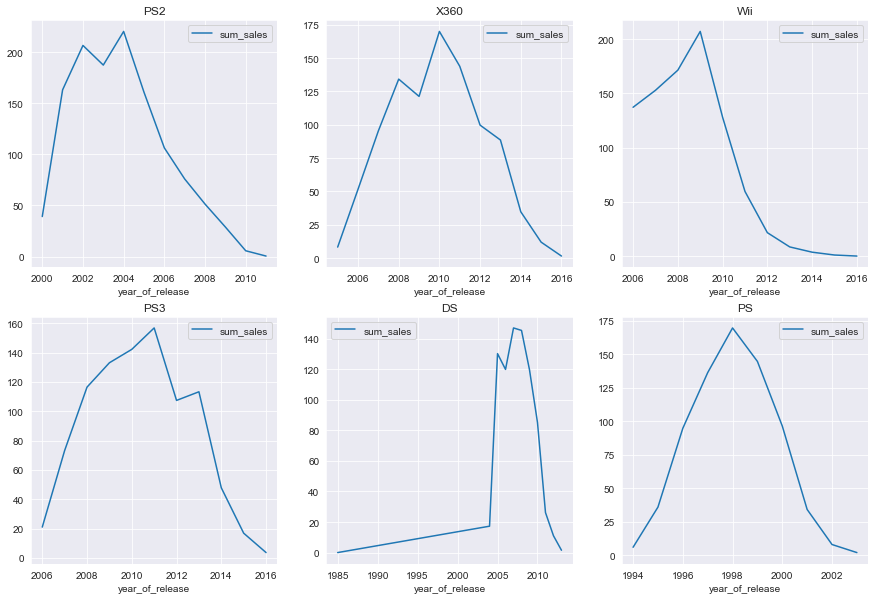

In [23]:
matrix_size=[2,3]
names_platforms=np.array(['PS2','X360','Wii','PS3','DS','PS']).reshape(2,3)
draw_matrix(matrix_size, (15,10), games, names_platforms, draw_func='line', get_func=get_sales_platform_by_years)

 Рассчитаем среднюю продолжительность существования платформы без учета актуальных на 2016 год.

In [24]:
def get_old_platforms(games):    
    old_platforms=[]
    for platform in games['platform'].unique():
        years_set=set(games.query('platform==@platform')['year_of_release'].unique())
        year=2016
        if not year in  years_set:
            old_platforms.append(platform)
    return old_platforms

def platform_time(games):
    years=[]
    for name in get_old_platforms(games):
        years.append(len([int(i) for i in get_sales_platform_by_years(games,name).index]))
    return np.mean(years)
        
print('Средняя продолжительность существования платформы: {:.2f}'.format(platform_time(games)))

Средняя продолжительность существования платформы: 6.95


Только 3 из 6 платформ (PS3, X360, Wii) - платформы, игры на которые продаются на момент 2016 года, и все они превысили среднюю продолжительность существования платформы. 

3 из 6 графиков относятся к консоли PlayStation. Исходя из этих графиков можно сделать предположение, что с выходом новой консоли, продажи старой падают. Построим график, для проверки этого предположения.

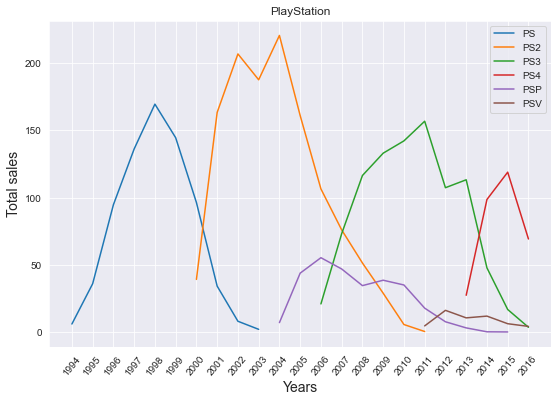

In [25]:
def draw_chart_one(games,names_list, title):
    set_years=set()
    sales_1=get_sales_platform_by_years(games,names_list[0])
    set_years.update(set(sales_1.index))
    sales_1.plot(figsize=(9,6))
    for name in names_list[1:]:
        sales_i=get_sales_platform_by_years(games,name)
        set_years.update(set(sales_i.index))
        plt.plot(sales_i)
    plt.ylabel('Total sales', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.xticks(range(int(min(set_years)),int(max(set_years))+1),rotation=50)
    plt.legend(names_list,loc='upper right')
    plt.title(title)
    plt.show()
draw_chart_one(games,['PS', 'PS2','PS3','PS4','PSP','PSV'], 'PlayStation')

Предположение подтвердилось. Стоит заметить, что портативные консоли PS приносят меньший доход. 
Построим подобный график для Xbox и Nintendo.

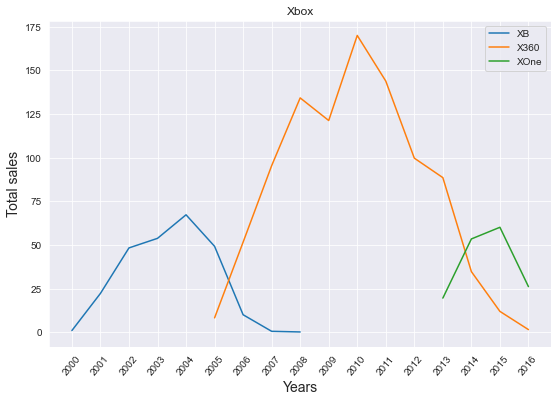

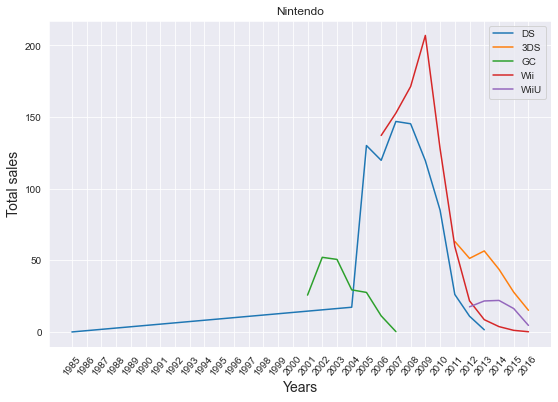

In [26]:
draw_chart_one(games,['XB', 'X360','XOne'], 'Xbox')
draw_chart_one(games,['DS','3DS','GC','Wii','WiiU'],'Nintendo')

    Можно предположить, что часть пользователей с PS перешло на Xbox, т.к. PS больше не достигла такого пика, который был у PS2. На это повлияло и то, что PS3 вышла на год позже и соотвественно рост продаж смещен. Продажи игр на Nintendo достигли своего пика примерно в 2009 и потом пошли на резкий спад. Возможно, что это связанно с тем, что не участвуя в технологической гонке, Nintendo делали расчет на обширную и неискушенную аудиторию, и в период перехода с 6 на 7 поколение это позволило им "выстрелить", но к 2010 году спрос на технологии, задаваемый компаниями Microsoft и Sony, возрос, а продажи игр на Nintendo упали. 

В целом начиная с 2013 года присутствуют все консоли, которые продаются на момент 2016 года. Значит в дальнейшем анализе будет использоваться срез данных от 2013 года до 2016.

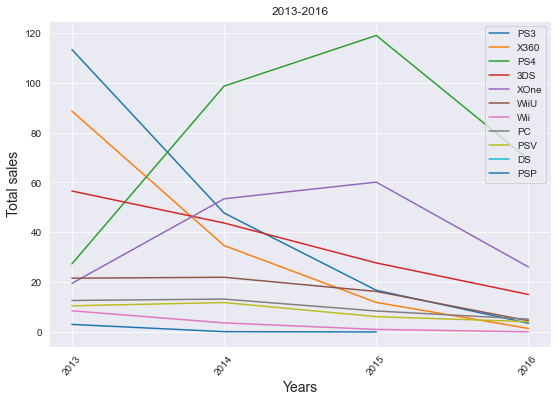

In [27]:
games_13_16=games.query('2013<=year_of_release<=2016')
platforms_13_16=games_13_16['platform'].unique()
draw_chart_one(games_13_16,platforms_13_16,'2013-2016') # посмотрим какие еще платформы мы не учли

Продажи ранее прибыльных игр на X360 и PS3 сократились в виду выхода новых версий.Игры на PSP не продаются с 2015, на DS c 2013 - можно исключить их из среза.
Продолжим анализ с платформами PC, PS4, XOne, WiiU, PS3, X360, Wii, 3DS, PSV.     

In [28]:
games_13_16=games.query('2013<=year_of_release<=2016') # Платформы на 2016 год: PC,
games_13_16=games_13_16.query('platform not in ["PSP","DS"]') #игровые консоли - PS4, XOne, Ps3, X360, WiiU, Wii,
                                                              #портативные системы - 3DS, PSV

Определен период и актуальные на 2016 платформы. Продолжим анализ.

## Распределение продаж по играм

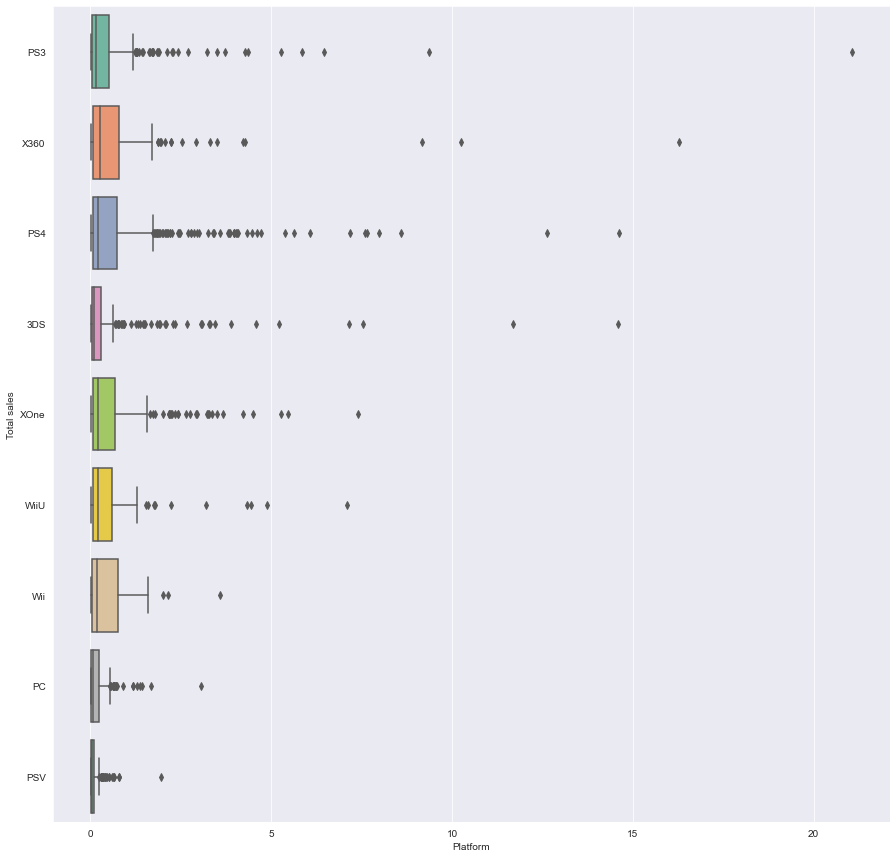

In [29]:
fig, ax = pyplot.subplots(figsize=(15,15))
sb.boxplot(ax=ax,y=games_13_16["platform"], x=games_13_16["sum_sales"], orient="h", palette = 'Set2')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.show()

    Игры на стационарные игровые консоли приносят больший доход, чем на PC и портативные консоли. Вероятно, это связано с тем, что большинство игроков играют со стационарных игровых консолей.
    Платформами, игры на которые переодически приносят доходы порядка миллиона, являются X360, Wii, PS4, XOne.	
    У PS3 и X360 много выбросов.
    Наименьший доход приносят игры портативной консоли PSV, что можно объяснить тем, что на 2016 год консоль PSV не имеет поддержки со стороны Sony.
    Посмотрим на значения среднего, медианы и количества продаваемых игр по платформам.

In [30]:
games_13_16_mean_median = games_13_16.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = ['mean','median'])
games_13_16_count=games_13_16.pivot_table(index = ['platform'], values = 'name', aggfunc = ['count'])
games_13_16_mean_median.index = games_13_16_count.index
pd.concat([games_13_16_mean_median, games_13_16_count],axis=1)

,mean,median,count
,sum_sales,sum_sales,name
platform,,,
3DS,0.472772,0.090,303
PC,0.209368,0.080,190
PS3,0.525884,0.150,345
PS4,0.801378,0.200,392
PSV,0.092151,0.040,358
Wii,0.593913,0.180,23
WiiU,0.562000,0.200,115
X360,0.735484,0.265,186


У платформ X360, XOne, PS4, WiiU наибольшие медианные значения, т.е. в целом игры на на них приносят больший доход. Но игры на PS4 чаще приносят необычно большие доходы.

По таблице видно, что платформы PS4, PS3, PSV, 3DS отличаются от остальных большим количеством игр.

Вывод:
 - Большая часть игровой аудитории играет со стационарных консолей, поэтому для максимализации продаж стоит ориентироваться на игры на платформы XOne, X360, PS4, PS3, WiiU, Wii. Причем игры на платформу PS4 имеют больший потенциал стать хитами продаж и принести необычно большой доход, при этом средний доход от игры порядка 200 тыс. 
 - В сегменте портативных консолей лидером является 3DS, и игры на эту платформу являются потенциально популярным продуктом.

## Распределение продаж по оценкам

Посмотрим, как влияют на продажи отзывы пользователей и критиков.

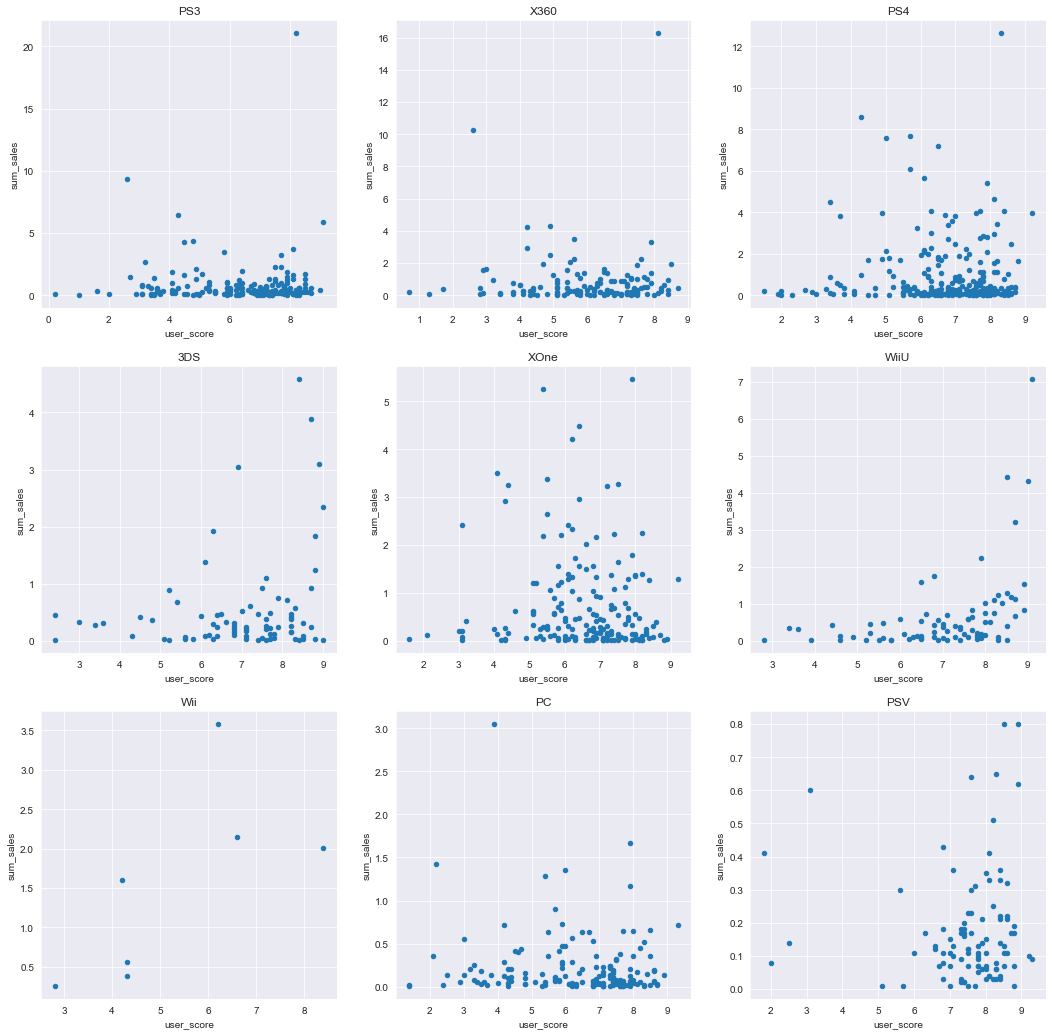

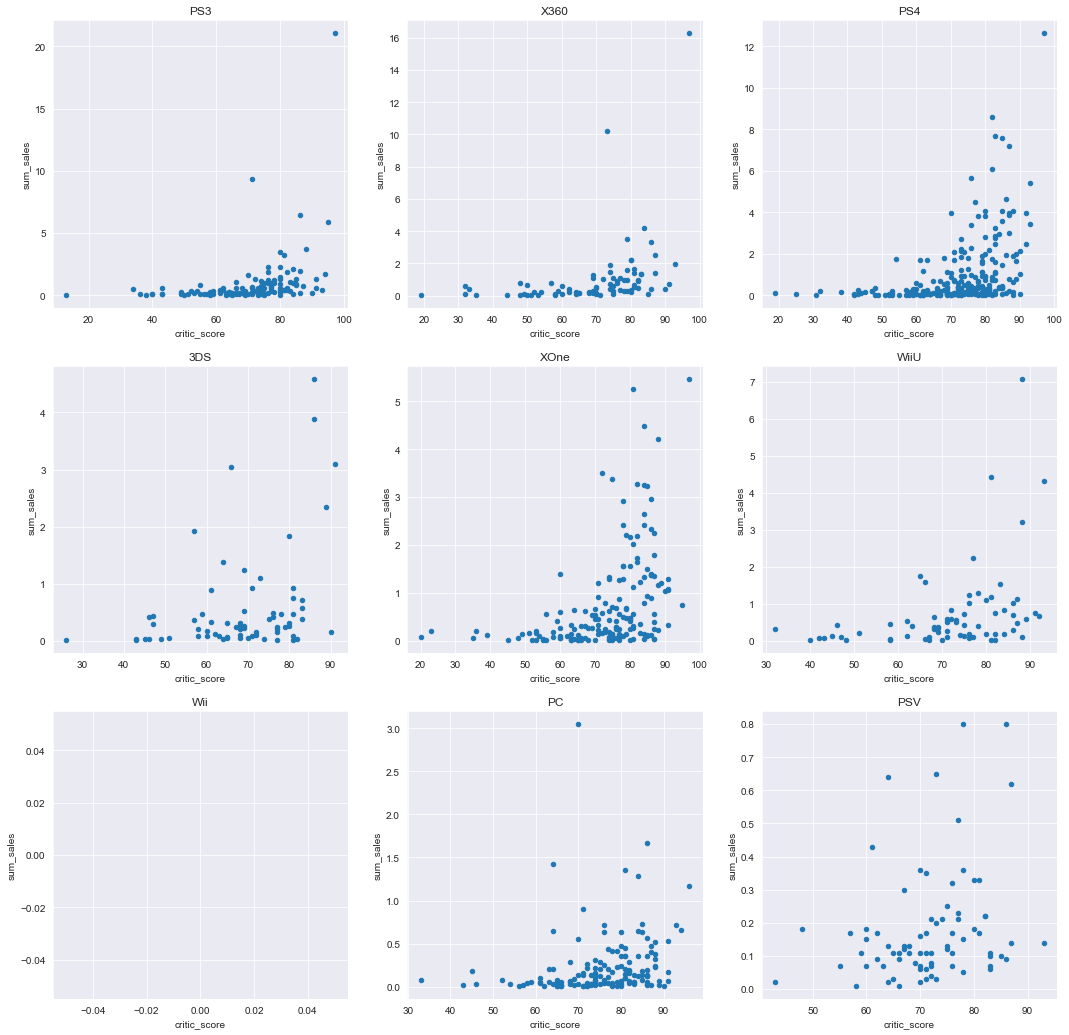

In [31]:
matrix_size=[3,3]
figsize=(18,18)
names=np.array([str(i) for i in games_13_16['platform'].unique()]).reshape((3,3))
draw_matrix(matrix_size, figsize, 
                    games_13_16, names, 
                        draw_func='scatter_user')
draw_matrix(matrix_size, figsize, 
                    games_13_16, names, 
                        draw_func='scatter_critic')

По диаграммам рассеяния видно, что по платфрмам WiiU, Wii, 3DS, PSV довольно мало данных, чтобы делать какие-то выводы насчет зависимости продаж от оценок.

Для других платформ большинство оценок лежат в таких интервалах: для пользователей от 5 до 9, для критиков от 50 до 90. Для оценок критиков характерен больший консерватизм - они стремяться голосовать одинаково, поэтому разброс оценок меньше. 
Рассчитаем коэффициент корреляции Пирсона между тремя признаками - оценки пользователей и критиков, суммарные продажи.

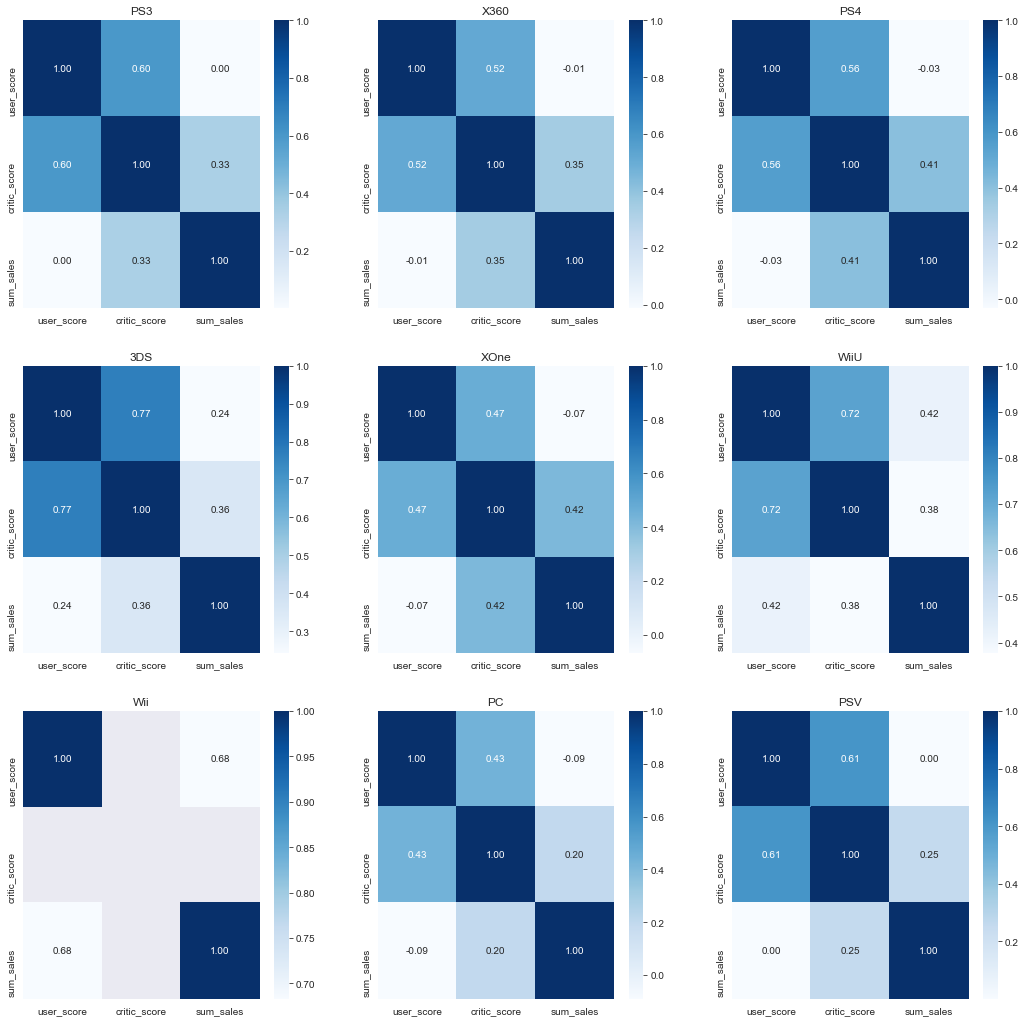

In [33]:
draw_matrix(matrix_size, figsize, 
                    games_13_16, names, 
                        draw_func='heatmap')

Между оценками пользователей и критиков прослеживается средняя корреляция. По таблицам видно, что для большинства платформ оценка критиков лучше коррелирует с продажами, а оценка пользователей никак не коррелирует. Но для платформ 3DS, Wii, WiiU это не так. Скорее всего это связано с тем, что по этим платформам меньше всего данных.

    Вывод:
    Оценки критиков менее разнообразны, более консервативны, обладают большей предсказательной способностью относительно продаж. Поэтому при максимизации продаж стоит обратить внимание на оценки критиков. 

## Распределение игр по жанрам

    Посмотрим, зависят ли продажи от жанров игр.

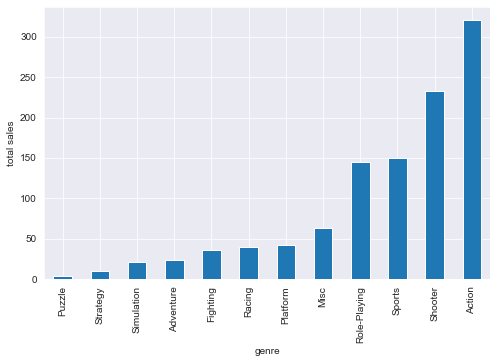

In [34]:
games_by_genres=(games_13_16
                    .pivot_table(index='genre',values='sum_sales',aggfunc='sum')
                    .sort_values(by='sum_sales'))
games_by_genres.plot(figsize=(8,5),kind='bar',legend=False)
plt.ylabel('total sales')
plt.xlabel('genre')
plt.show()

    Наиболее прибыльными жанрами являются - экшен, шутер, спорт, ролевые игры.
    Меньший доход приносят игры в жанрах приключение, стратегии и пазлы.

# Портрет пользователя

    Разобьем данные на подгруппы по регионам продаж. Посмотрим влияют ли на них платформа, жанр, и рейтинг одинакого или по разному. Оценка будет производится на основании доли продаж в этом регионе.
    Сводка знаков рейтинга ESRB:
     - E - для всех
     - E10+ - для всех от 10 и старше
     - Т - подросткам
     - M - для взрослых

Для начала узнаем как распределены продажи по регионам.

In [35]:
total_regions=np.sum(games_13_16['sum_sales'])
na=np.sum(games_13_16['na_sales'])/total_regions
eu=np.sum(games_13_16['eu_sales'])/total_regions
jp=np.sum(games_13_16['jp_sales'])/total_regions
other=np.sum(games_13_16['other_sales'])/total_regions
print('Доля продаж, приходящаяся на Северную Америку: {0:.2f}\nДоля продаж, приходящаяся на Европу: {1:.2f}\nДоля продаж, приходящаяся на Японию: {2:.2f}\nДоля продаж, приходящаяся на другие регионы: {3:.2f}\n'.format(na,eu,jp,other))

Доля продаж, приходящаяся на Северную Америку: 0.40
Доля продаж, приходящаяся на Европу: 0.36
Доля продаж, приходящаяся на Японию: 0.13
Доля продаж, приходящаяся на другие регионы: 0.11



    Основная доля (~76%) продаж приходится на СА и Европу. 

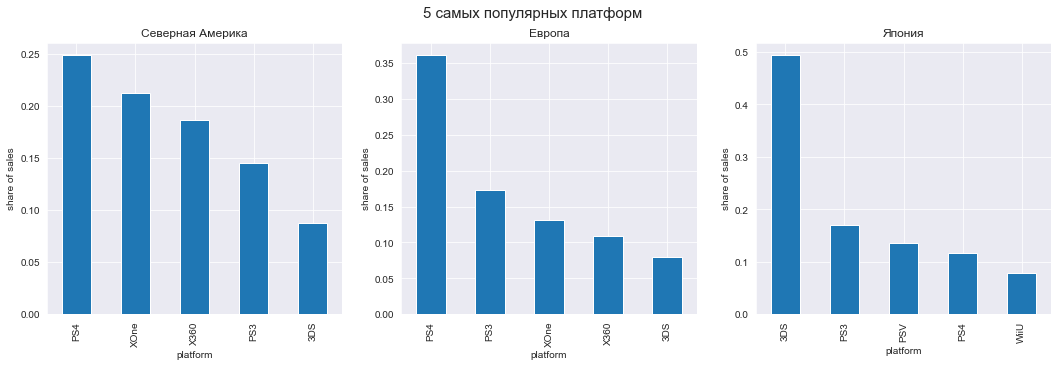

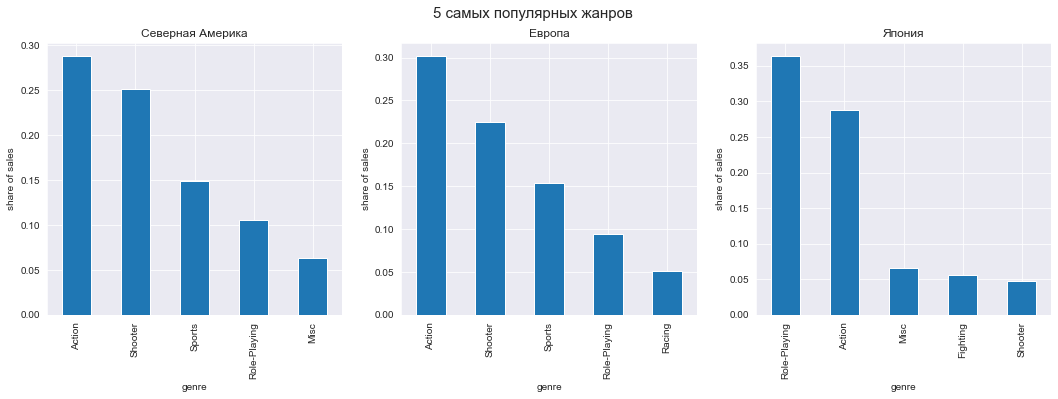

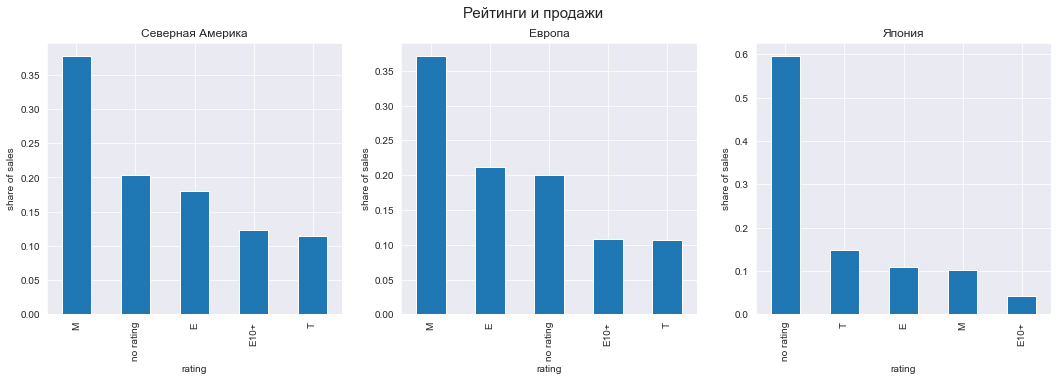

In [36]:
def get_top(games,index,total,col):
    return (games[[col,index+'_sales']].pivot_table(index=col,values=index+'_sales',aggfunc=(lambda x:sum(x)/total))
          .sort_values(by=index+'_sales',ascending=False)[index+'_sales'][:5])

def draw_row(games,axes,region_names,col):
    for ax, index in zip(axes,region_names):
        total=np.sum(games[index+'_sales'])
        data=get_top(games,index,total,col)
        data.plot(ax=ax,kind='bar')
        ax.set_ylabel('share of sales')
        ax.set_title(region_names[index])
    plt.show()
    
def draw_top_region(games):
    region_names={'na':'Северная Америка','eu':'Европа','jp':'Япония'}
    func_title={'5 самых популярных платформ': 'platform','5 самых популярных жанров':'genre','Рейтинги и продажи':'rating'}
    for title in func_title:
        fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(18,5))
        plt.suptitle(title,fontsize=15)
        draw_row(games,axes,region_names,func_title[title])

draw_top_region(games_13_16)

    ПЛАТФОРМЫ:
    В топе платформ Европы и Северной Америки представлены одни и те же платформы с разницей в том, что в Европе PS3 на втором месте, а в Северной Америке на 4. Возможно, это связано с тем, что продукция компании Microsoft более популярна в США, а не в Европе. В Японии топ платформ занимают платформы от японских компаний Sony(PS3,PSV,PS4) и Nintendo(3DS,WiiU). Почти половина продаж приходится на портативную приставку 3DS, в то время как в СА и Европе она только на 5 месте.
    ЖАНРЫ:
    В Европе и СА топ отличается только по 5 позиции - в СА предпочитают Misc, а в Европе гонки. В Японии присутствуют жанры общие для СА и Европы - ролевые игры(самые популярные), экшн, шутер, но на других позициях, а также Misc, как в СА и файтинг, как особенность японского топа.
    РЕЙТИНГ.
    В СА и Европе почти одинаковые рейтинг - больше всего приходится на игры для взрослых(почти две пятых), пятая часть на "для всех", и пятая часть на подростков и детей старше 10. Еще две пятых не определено, с разницей в том, что в СА доля игр с неопределенным рейтингом чуть больше.
    В Японии не определено три пятых всех оценок. Все играют примерно одинаково, хотя игры в рейтинге для детей от 10 до 13 продаются хуже. 

    Вывод:
    Японские покупатели сильно отличаются от покупателей СА и Европы. Япония обладает своей собственной развитой индустрией видеоигр, обеспечивающей по большей части внутрияпонский рынок, ориентированной на вкусовые предпочтениях японцев, которые действительно отличаются от европейских и американских. Поэтому доля продаж приходящаяся на Японию сравнительно маленькая. 
    При планировании компании на следующий год стоит ориентироваться на предпочтения СА и Европы, как регионов, на которые приходится основная доля продаж. Безусловный лидер для этих регионов - игры на стационарную платформу PS4 c рейтингом "M", жанров Action, Shooter, Sports, Role-Playing. 

## Рейтинг по жанрам

Посмотрим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.


    Построим гистограммы распределения пользовательских оценок.

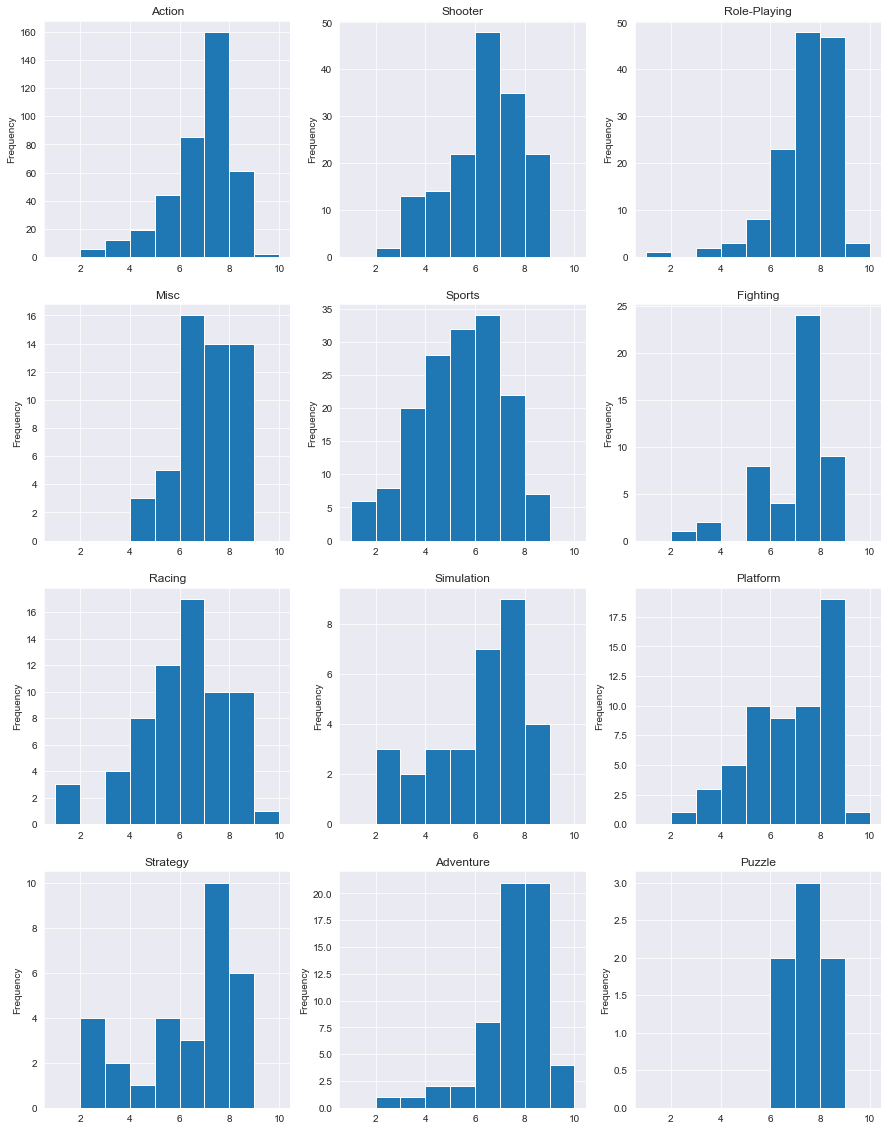

In [37]:
names_genres=np.array(games_13_16['genre'].unique()).reshape(4, 3)
matrix_size=[4,3]
draw_matrix(matrix_size, (15,20), games_13_16, names_genres, draw_func='hist_user', get_func=get_us_score_by_genres)

    Построим гистограммы распределения оценок критиков.

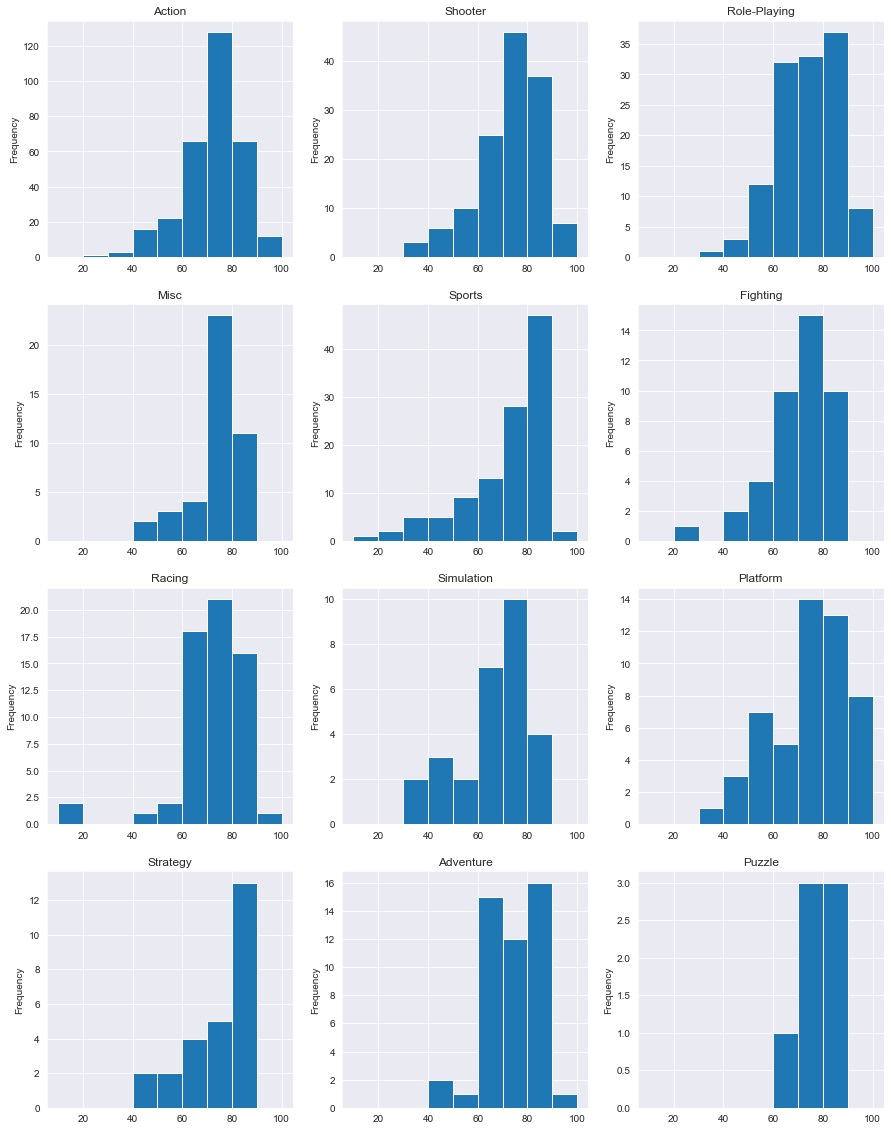

In [38]:
draw_matrix(matrix_size, (15,20), games_13_16, names_genres, draw_func='hist_critic', get_func=get_cr_score_by_genres)

    Посмотрим на статистику

In [39]:
stats_genres=games_13_16.pivot_table(index='genre',values=['user_score','critic_score'],aggfunc=['count','mean','var','std'])
stats_genres=stats_genres.sort_values(by = ('count','critic_score'), ascending = False)
pd.concat([stats_genres, np.mean(stats_genres).to_frame(name='Mean').T])

count                     mean                     var  \
             critic_score  user_score critic_score user_score critic_score   
Action         314.000000  389.000000    71.500000   6.847044   141.976038   
Shooter        134.000000  156.000000    72.917910   6.342308   162.105993   
Role-Playing   126.000000  135.000000    73.468254   7.369630   141.706984   
Sports         112.000000  159.000000    71.660714   5.249686   266.820785   
Racing          61.000000   65.000000    71.229508   6.080000   187.813115   
Platform        51.000000   58.000000    73.823529   6.713793   204.988235   
Adventure       47.000000   60.000000    72.638298   7.461667   116.322849   
Misc            43.000000   52.000000    73.279070   6.975000    79.825028   
Fighting        42.000000   48.000000    69.595238   7.037500   172.490708   
Simulation      28.000000   31.000000    64.857143   6.054839   212.349206   
Strategy        26.000000   30.000000    74.576923   6.183333   161.133846   
Puzzle           7.000000    7.000000    75.571429   7.471429    58.952381   
Mean            82.583333   99.166667    72.093168   6.648852   158.873764   

                                 std             
             user_score critic_score user_score  
Action         1.765694    11.915370   1.328794  
Shooter        2.167489    12.732085   1.472239  
Role-Playing   1.494668    11.904074   1.222566  
Sports         3.179225    16.334650   1.783038  
Racing         2.989750    13.704493   1.729089  
Platform       2.889631    14.317410   1.699891  
Adventure      1.688506    10.785307   1.299425  
Misc           1.407010     8.934485   1.186174  
Fighting       1.918989    13.133572   1.385276  
Simulation     3.347892    14.572207   1.829725  
Strategy       4.351092    12.693851   2.085927  
Puzzle         0.885714     7.678045   0.941124  
Mean           2.340472    12.392129   1.496939

 - И по гистограммам и по дисперсии видно, что пользовательские оценки имеют чуть больший разброс, чем оценки критиков. 
 - Самый непопулярный жанр игр - пазлы, обладают маленькой, но лояльной аудиторией. У жанра Adventure наиболее высокие пользовательские оценки.
 - Из популярных жанров сильно выделяется спорт - критики оценивают игры этого жанра в среднем выше, чем пользователи, у него наименьшее значение среднего по всем жанрам среди пользовательских оценок. Самые высокие оценки, пользователей, так и критиков среди популярных жанров у Role-Playing.

## Проверка гипотез

Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 > Т.е. нулевая гипотеза ($H_0$) - средние генеральной совокупности пользовательских оценок игр на Xbox One и генеральной совокупности пользовательских оценок игр на PC равны.
 > Альтернативная ($H_a$)-  средние генеральной совокупности пользовательских оценок игр на Xbox One и генеральной совокупности пользовательских оценок игр на PC не равны.

In [40]:
sample1=games_13_16.query('platform=="PC" and user_score.notnull()',engine='python')['user_score']
sample2=games_13_16.query('platform=="XOne"and user_score.notnull()',engine='python')['user_score'][:sample1.shape[0]]
var1=np.var(sample1)
var2=np.var(sample2)
equal_flag=True
if var1!=var2:
    print('Дисперсии двух выборок неравны')
    equal_flag=False
else:
    print('Дисперсии двух выборок равны')
alpha = .05 
results = st.ttest_ind(
    sample1, 
    sample2,equal_var=equal_flag)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Дисперсии двух выборок неравны
p-значение: 0.22471038204923655
Не получилось отвергнуть нулевую гипотезу


Нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC разные.
Вероятность получить наблюдаемое отклонение выборочных средних, если гипотеза верна, равна - 0,22.

Проверим гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
> Т.е. нулевая гипотеза ($H_0$) - средние генеральной совокупности пользовательских оценок игр жанра Action и генеральной совокупности пользовательских оценок игр жанра Sports не равны.
> Альтернативная ($H_a$)-  средние генеральной совокупности пользовательских оценок игр жанра Action и генеральной совокупности пользовательских оценок игр жанра Sports равны

In [41]:
sample3=games_13_16.query('genre=="Sports" and user_score.notnull()',engine='python')['user_score']
sample4=games_13_16.query('genre=="Action" and user_score.notnull()',engine='python')['user_score'][:sample3.shape[0]]
var3=np.var(sample3)
var4=np.var(sample4)
equal_flag=True
if var3!=var4:
    print('Дисперсии двух выборок неравны')
    equal_flag=False
else: 
    print('Дисперсии двух выборок равны')
alpha = .05
results = st.ttest_ind(
    sample3, 
    sample4,equal_var=equal_flag)
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии двух выборок неравны
p-значение: 8.611565258744146e-19
Не получилось отвергнуть нулевую гипотезу


Нет оснований утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Вероятность получить наблюдаемое отклонение выборочных средних, если верна альтернативная гипотеза, близка к 0. 

# Общие выводы

    Некоторые закономерности, определяющие успешность игры:
    - Актуальные на данном этапе развития игровой индустрии платформы - это консоли седьмого (PS3, X360, Wii) и восьмого поколения (PS4, XOne, WiiU, 3DS, PSV), и PC. Консоли предыдущих поколений превысили среднюю продолжительность существования платформы, поэтому игры на эти платформы не являются потенциально прибыльными, несмотря на то, что игры на платформы PS3 и X360 все еще успешно продаются. 
    - Наиболее прибыльные игры на стационарные игровые консоли. Среди них потенциально более успешными являются игры на PS4 и XOne. При этом, медианный доход с игры PS4 на 20 тыс. меньше, чем у XOne, но частота появления игр с необычайно большими доходами выше. 
    - В сегменте портативных консолей доминирует консоль 3DS от Nintendo.
    - Наиболее популярные жанры - Role-Playing, Action, Shooter (входят в топ стран-лидеров по потреблению игровой продукции магазина).
    - Основная доля продаж приходится на СА и Европу.
    - Общее для покупателей Европы и СА: наиболее прибыльны игры на платформу PS4; игры с рейтингом 'M'(для взрослых) и 'E' покупают чаще. Значимые различия: для СА игры на платформу XOne и X360 компании Microsoft продаются лучше.
    - Оценки игр критиками обладают большей предсказательной способностью относительно продаж, чем пользовательские. Также критики склонны давать более высокие оценки, возможно, в силу того, что они изначально оценивают игры обладающие потенциалом успешности. Так, игры жанра спорт оцениваются критиками гораздо выше, чем пользователями.
    
    
    В соответствии с выявленными закономерностями можно дать такие рекомендации: 
    
    Потенциально успешные игры, обладают следующими характеристиками:
    - идут на стационарные игровые консоли, прежде всего PS4;
    - нацелены преимущественно на взрослую аудиторию, но также и на любую возрастную категорию;  
    - относятся к жанрам Role-Playing, Action, Shooter;
    - имеют высокие оценки критиков.
    
    Рекламную компанию целесообразно нацеливать на западную аудиторию (СА и Европу).